<a href="https://colab.research.google.com/github/salemprakash/EDA/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Merging database-style dataframes
Many beginner developers get **confused** when working with pandas dataframes, especially regarding when to use **append, concat, merge, or join**.
Let's assume that you are working at a university as a professor teaching a **Software Engineering course** and an **Introduction to Machine Learning course**, and there are enough students to split into two classes.
Checkout the following Screenshot.
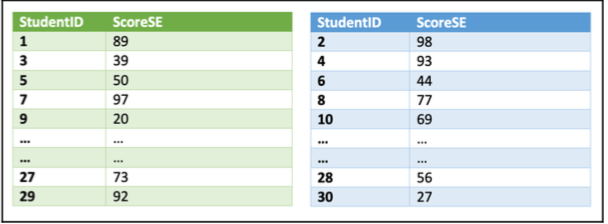

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataFrame1 =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'Score' : [89, 39, 50, 97, 22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
dataFrame2 =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'Score': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

# In the dataset above, the first column contains information about student identifier and the second column contains their respective scores in any subject. The structure of the dataframes is same in the bothe case. In this case, we would need to concatenate both of them.


In [ ]:
# We can do that by using Pandas concat() method.

dataframe = pd.concat([dataFrame1, dataFrame2], ignore_index=True)
dataframe

In [ ]:
pd.concat([dataFrame1, dataFrame2], axis=1)

#Merging

In [ ]:
df1SE =  pd.DataFrame({ 'StudentID': [9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'ScoreSE' : [22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
df2SE =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'ScoreSE': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

df1ML =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'ScoreML' : [39, 49, 55, 77, 52, 86, 41, 77, 73, 51, 86, 82, 92, 23, 49]})
df2ML =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'ScoreML': [93, 44, 78, 97, 87, 89, 39, 43, 88, 78]})


In [ ]:
# Option 1
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = pd.concat([dfML, dfSE], axis=1)
df

In [ ]:
# Option 2
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='inner')
df

# Here, you will perform inner join with each dataframe. That is to say, if an item exists on the both dataframe, will be included in the new dataframe. This means, we will get the list of students who are appearing in both the courses.


In [ ]:
# Option 3
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='left')
df

In [ ]:
# Option 4
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='right')
df


In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%204/sales.csv')
df.head(10)

In [ ]:
#@title Default title text
#Add new colum that is the total price based on the quantity and the unit price

df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df.head(10)

In [ ]:
df['Company'].value_counts()

In [ ]:
df.describe()

#Reshaping with Hierarchical Indexing

In [ ]:
data = np.arange(15).reshape((3,5))
indexers = ['Rainfall', 'Humidity', 'Wind']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Bergen', 'Oslo', 'Trondheim', 'Stavanger', 'Kristiansand'])
dframe1


In [ ]:
stacked = dframe1.stack()
stacked


In [ ]:
stacked.unstack()

In [ ]:
series1 = pd.Series([000, 111, 222, 333], index=['zeros','ones', 'twos', 'threes'])
series2 = pd.Series([444, 555, 666], index=['fours', 'fives', 'sixs'])

frame2 = pd.concat([series1, series2], keys=['Number1', 'Number2'])
frame2.unstack()

#Data deduplication

In [ ]:
frame3 = pd.DataFrame({'column 1': ['Looping'] * 3 + ['Functions'] * 4, 'column 2': [10, 10, 22, 23, 23, 24, 24]})
frame3

In [ ]:
frame3.duplicated()

In [ ]:
frame4 = frame3.drop_duplicates()
frame4

In [ ]:
frame3['column 3'] = range(7)
frame5 = frame3.drop_duplicates(['column 2'])
frame5

#Replacing values